#**Installing Kaggle**

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#**Importing Dataset**

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#**Importing Libraries**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# **Data Preprocessing**

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1581.jpg', 'with_mask_1932.jpg', 'with_mask_1982.jpg', 'with_mask_434.jpg', 'with_mask_3656.jpg']
['with_mask_2483.jpg', 'with_mask_1887.jpg', 'with_mask_3512.jpg', 'with_mask_2361.jpg', 'with_mask_2670.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3403.jpg', 'without_mask_679.jpg', 'without_mask_2559.jpg', 'without_mask_3285.jpg', 'without_mask_1696.jpg']
['without_mask_1082.jpg', 'without_mask_1534.jpg', 'without_mask_1654.jpg', 'without_mask_2579.jpg', 'without_mask_3804.jpg']


## Total Number of Images


In [9]:
print('Total Number of with mask images :' , len(with_mask_files))
print('Total Number of without mask images :' , len(without_mask_files))

Total Number of with mask images : 3725
Total Number of without mask images : 3828


#**Creating Labels**

with mask => 1

without mask => 0

In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels

In [12]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#**Displaying the Images**

## Displaying Images with Mask

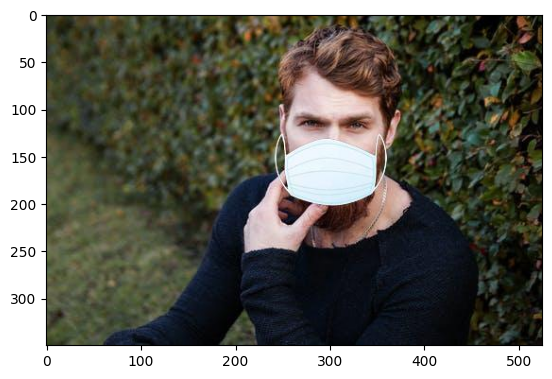

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

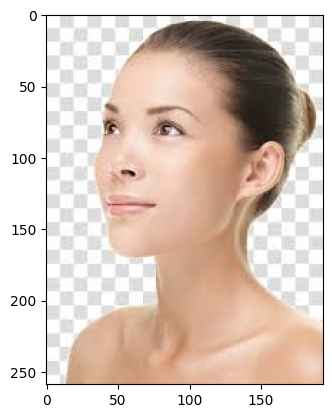

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Image Processing**

In [15]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Checking the Datatype

In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[249, 254, 243],
        [254, 250, 255],
        [255, 249, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 252, 216],
        [249, 247, 160],
        [252, 247, 142],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 248, 174],
        [240, 240,  30],
        [251, 241,   3],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[246, 249, 250],
        [216, 220, 222],
        [182, 185, 191],
        ...,
        [194, 194, 196],
        [183, 184, 186],
        [195, 195, 197]],

       [[244, 249, 250],
        [228, 233, 237],
        [196, 200, 206],
        ...,
        [187, 186, 191],
        [182, 182, 186],
        [201, 201, 205]],

       [[244, 251, 252],
        [228, 235, 241],
        [218, 223, 229],
        ...,
        [199, 198, 204],
        [211, 210, 217],
        [231, 230, 235]]], dtype=uint8)
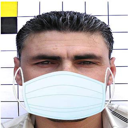

In [18]:
data[0]

# **Splitting the Data**

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [21]:
print(Y)

[1 1 1 ... 0 0 0]


# **Train Test Split**

In [22]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [23]:
print(X.shape ,
      Y.shape ,
      X_train.shape ,
      X_test.shape ,
      Y_train.shape ,
      Y_test.shape)

(7553, 128, 128, 3) (7553,) (6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


#**Scaling the Data**

In [24]:
X_train_scale = X_train/255
Y_train_scale = Y_train/255
X_test_scale = X_test/255

array([[[63, 65, 51],
        [51, 53, 39],
        [44, 45, 31],
        ...,
        [70, 55, 36],
        [69, 55, 36],
        [67, 56, 36]],

       [[52, 52, 36],
        [44, 44, 28],
        [38, 38, 22],
        ...,
        [72, 58, 41],
        [70, 57, 40],
        [68, 57, 39]],

       [[47, 44, 26],
        [43, 41, 22],
        [41, 38, 22],
        ...,
        [69, 57, 42],
        [69, 56, 42],
        [72, 59, 44]],

       ...,

       [[78, 61, 55],
        [75, 61, 55],
        [71, 60, 58],
        ...,
        [34, 36, 35],
        [40, 42, 41],
        [47, 52, 48]],

       [[84, 67, 59],
        [81, 66, 60],
        [77, 65, 62],
        ...,
        [27, 29, 28],
        [29, 32, 30],
        [38, 44, 40]],

       [[88, 70, 63],
        [85, 70, 63],
        [81, 69, 65],
        ...,
        [24, 26, 25],
        [25, 28, 27],
        [31, 37, 33]]], dtype=uint8)
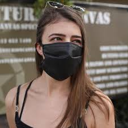

In [25]:
X_train[0]

In [26]:
X_train_scale[0]

array([[[0.24705882, 0.25490196, 0.2       ],
        [0.2       , 0.20784314, 0.15294118],
        [0.17254902, 0.17647059, 0.12156863],
        ...,
        [0.2745098 , 0.21568627, 0.14117647],
        [0.27058824, 0.21568627, 0.14117647],
        [0.2627451 , 0.21960784, 0.14117647]],

       [[0.20392157, 0.20392157, 0.14117647],
        [0.17254902, 0.17254902, 0.10980392],
        [0.14901961, 0.14901961, 0.08627451],
        ...,
        [0.28235294, 0.22745098, 0.16078431],
        [0.2745098 , 0.22352941, 0.15686275],
        [0.26666667, 0.22352941, 0.15294118]],

       [[0.18431373, 0.17254902, 0.10196078],
        [0.16862745, 0.16078431, 0.08627451],
        [0.16078431, 0.14901961, 0.08627451],
        ...,
        [0.27058824, 0.22352941, 0.16470588],
        [0.27058824, 0.21960784, 0.16470588],
        [0.28235294, 0.23137255, 0.17254902]],

       ...,

       [[0.30588235, 0.23921569, 0.21568627],
        [0.29411765, 0.23921569, 0.21568627],
        [0.27843137, 0

#**Building a Convolutional Neural Networks [CNN]**

In [27]:
num_of_classes = 2

model = keras.Sequential()

# Alternative way of adding layer
model.add(keras.layers.Conv2D(32 , kernel_size=(3,3) , activation = 'relu' , input_shape = (128,128,3))) # 32 is used as a filter.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

#**Compiling the Convulutional Neural Network [CNN]**

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 [==============================] - 10s 25ms/step - loss: 0.4702 - acc: 0.7936 - val_loss: 0.3049 - val_acc: 0.8727
Epoch 2/15
170/170 [==============================] - 3s 17ms/step - loss: 0.3048 - acc: 0.8830 - val_loss: 0.2663 - val_acc: 0.8909
Epoch 3/15
170/170 [==============================] - 3s 17ms/step - loss: 0.2646 - acc: 0.8917 - val_loss: 0.2116 - val_acc: 0.9008
Epoch 4/15
170/170 [==============================] - 3s 19ms/step - loss: 0.2164 - acc: 0.9121 - val_loss: 0.2298 - val_acc: 0.9058
Epoch 5/15
170/170 [==============================] - 3s 18ms/step - loss: 0.1923 - acc: 0.9215 - val_loss: 0.2280 - val_acc: 0.9058
Epoch 6/15
170/170 [==============================] - 3s 17ms/step - loss: 0.1665 - acc: 0.9331 - val_loss: 0.2052 - val_acc: 0.9174
Epoch 7/15
170/170 [==============================] - 3s 17ms/step - loss: 0.1432 - acc: 0.9456 - val_loss: 0.1728 - val_acc: 0.9273
Epoch 8/15
170/170 [==============================] - 3s 18ms/step -

#**Model Evaluation**

In [30]:
loss, accuracy = model.evaluate(X_test_scale, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2931 - acc: 0.9398
Test Accuracy = 0.9397749900817871


#**Plotting the Loss and Accuracy Scores**

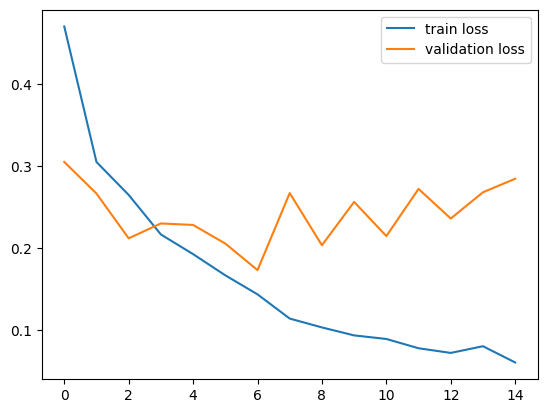

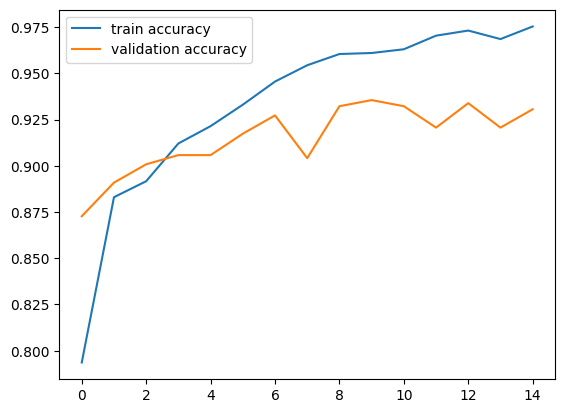

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#**Predictive System**

## Printing the Images with Mask

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


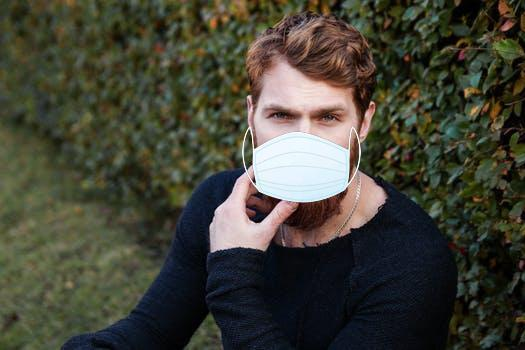

1/1 [==============================] - 0s 376ms/step
[[0.09264077 0.7158598 ]]
1
The person in the image is wearing a mask


In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

## Printing the Images without Mask

Path of the image to be predicted: /content/data/without_mask/without_mask_2925.jpg


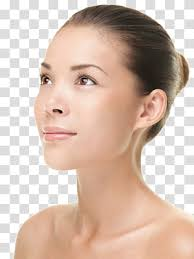

1/1 [==============================] - 0s 18ms/step
[[0.05671554 0.7818565 ]]
1
The person in the image is wearing a mask


In [33]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')